In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
import pandas as pd
import matplotlib.ticker as ticker

data_dir = path.join("Data","pre-trec")
labels = ["paiceHusk", "krovetz", "sStripping", "porter2", "lovins", "wikt", "none"]

,stemmer,map
0,paiceHusk,0.3399
1,krovetz,0.3707
2,sStripping,0.3406
3,porter2,0.3669
4,lovins,0.3502
5,wikt,0.3393
6,none,0.3781


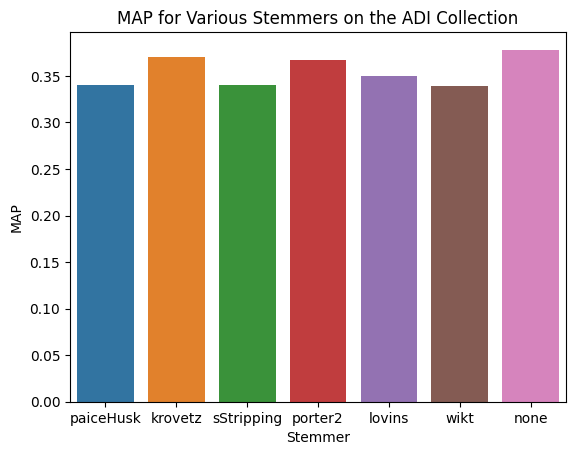

In [10]:
values = list()
with open(path.join(data_dir,"adi-MAP"), "r") as f:
    for line in f:
        values.append(float(line.strip()))
data = {
    "stemmer" : labels,
    "map" : values
}
df = pd.DataFrame(data=data)
display(df)
sns.barplot(x="stemmer", y="map", data=df)
plt.title("MAP for Various Stemmers on the ADI Collection")
plt.xlabel("Stemmer")
plt.ylabel("MAP")
plt.show()

,stemmer,map
0,paiceHusk,0.1620
1,krovetz,0.1838
2,sStripping,0.1704
3,porter2,0.1571
4,lovins,0.1556
5,wikt,0.1672
6,none,0.2661


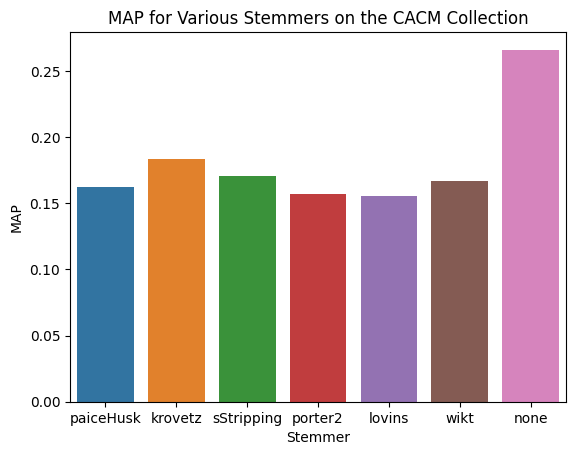

In [11]:
values = list()
with open(path.join(data_dir,"cacm-MAP"), "r") as f:
    for line in f:
        values.append(float(line.strip()))
data = {
    "stemmer" : labels,
    "map" : values
}
df = pd.DataFrame(data=data)
display(df)
sns.barplot(x="stemmer", y="map", data=df)
plt.title("MAP for Various Stemmers on the CACM Collection")
plt.xlabel("Stemmer")
plt.ylabel("MAP")
plt.show()

,stemmer,map
0,paiceHusk,0.1839
1,krovetz,0.1717
2,sStripping,0.1610
3,porter2,0.1819
4,lovins,0.1801
5,wikt,0.1778
6,none,0.1668


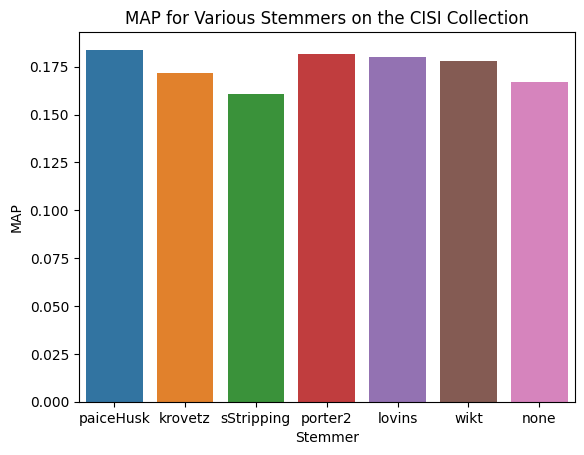

In [12]:
values = list()
with open(path.join(data_dir,"cisi-MAP"), "r") as f:
    for line in f:
        values.append(float(line.strip()))
data = {
    "stemmer" : labels,
    "map" : values
}
df = pd.DataFrame(data=data)
display(df)
sns.barplot(x="stemmer", y="map", data=df)
plt.title("MAP for Various Stemmers on the CISI Collection")
plt.xlabel("Stemmer")
plt.ylabel("MAP")
plt.show()

,stemmer,map
0,paiceHusk,0.0632
1,krovetz,0.0582
2,sStripping,0.0654
3,porter2,0.0626
4,lovins,0.0575
5,wikt,0.0604
6,none,0.0705


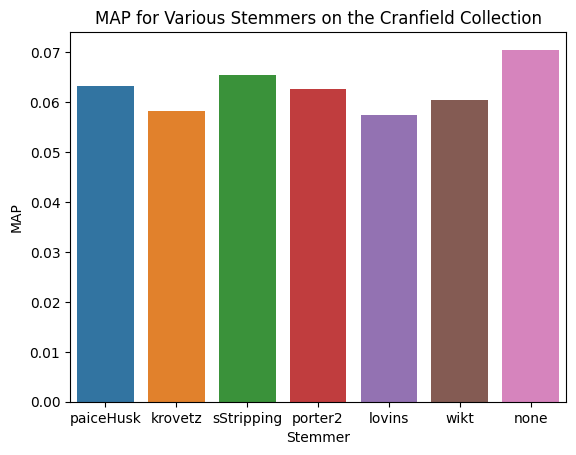

In [13]:
values = list()
with open(path.join(data_dir,"cran-MAP"), "r") as f:
    for line in f:
        values.append(float(line.strip()))
data = {
    "stemmer" : labels,
    "map" : values
}
df = pd.DataFrame(data=data)
display(df)
sns.barplot(x="stemmer", y="map", data=df)
plt.title("MAP for Various Stemmers on the Cranfield Collection")
plt.xlabel("Stemmer")
plt.ylabel("MAP")
plt.show()

,stemmer,map
0,paiceHusk,0.4443
1,krovetz,0.4554
2,sStripping,0.4612
3,porter2,0.4575
4,lovins,0.4572
5,wikt,0.4571
6,none,0.4528


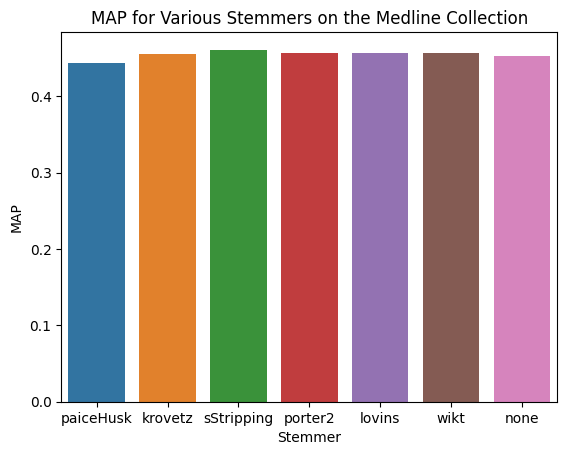

In [14]:
values = list()
with open(path.join(data_dir,"med-MAP"), "r") as f:
    for line in f:
        values.append(float(line.strip()))
data = {
    "stemmer" : labels,
    "map" : values
}
df = pd.DataFrame(data=data)
display(df)
sns.barplot(x="stemmer", y="map", data=df)
plt.title("MAP for Various Stemmers on the Medline Collection")
plt.xlabel("Stemmer")
plt.ylabel("MAP")
plt.show()